# Customer Churn

##### This notebook contains the Feature Engeering / Model Traning for project Churn Analysis

### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### Data Collection
- Dataset Source - https://www.kaggle.com/datasets/undersc0re/predict-the-churn-risk-rate
- The data consists of 23 column and 36992 rows.

### Table of Contents


1) Problem Statement


2) Data Dictionary


3) Import Libraries


4) Data Pre-Processing

    4.1 - Missing Values

    4.2 - Outliers

    4.3 - Categorical Data Encoding
    
    4.4 - Feature Scaling
    
    
5) Model Evaluation

    5.1 - Feature Selection using Random Forest
    
    5.2 - Grid Search CV
    
    5.3 - Kfold Cross Validation
    
    5.4 - Defining Functions
    
    5.4.1 - Confusion Matrix
    
    5.4.2 - ROC Curve
    
    5.4.3 - Classification Report
    
    5.4.4 - Accuracy
    
    5.4.5 - F1 Score
    
    
6) Model Building

    6.1 - Logistic Regression
    
    6.2 - Naive Bayes
    
    6.3 - K nearest neighbors (KNN)
    
    6.4 - Random Forest
    
    6.5 - AdaBoost
    
    6.6 - XGBoost
    
    6.7 - Catboost
    
    
7) Model Performance


8) Model Ensembling

    8.1 - Voting Classifier
    
    8.2 - Stacking Classifier
    
    
9) Displaying Score Summary

### 1) Problem statement

- Churn rate is a marketing metric that describes the number of customers who leave a business over a specific time period. Understanding and detecting churn is the first step to retaining these customers and improving the company’s offerings.


- Goal is to predict the churn for a website based on the features provided in the dataset. Customer will EXIT(1) or NOT(0), and identify customers who are likely to leave so that we can retain then with some special offers on membership.





### 2. Data Dictionary 

1) age : Represents the age of a customer

2) gender : Represents the gender of a customer

3) security_no : Represents a unique security number that is used to identify a person

4) region_category : Represents the region that a customer belongs to

5) membership_category : Represents the category of the membership that a customer is using

6) joining_date : Represents the date when a customer became a member

7) joined_through_referral : Represents whether a customer joined using any referral code or ID

8) referral_id : Represents a referral ID

9) preferred_offer_types : Represents the type of offer that a customer prefers

10) medium_of_operation : Represents the medium of operation that a customer uses for transactions

11) internet_option : Represents the type of internet service a customer uses

12) last_visit_time : Represents the last time a customer visited the website

13) days_since_last_login : Represents the no. of days since a customer last logged into the website

14) avg_time_spent : Represents the average time spent by a customer on the website

15) avg_transaction_value : Represents the average transaction value of a customer

16) avg_frequency_login_days : Represents the no. of times a customer has logged in to the website

17) points_in_wallet : Represents the points awarded to a customer on each transaction

18) used_special_discount : Represents whether a customer uses special discounts offered

19) offer_application_preference : Represents whether a customer prefers offers

20) past_complaint : Represents whether a customer has raised any complaints

21) complaint_status : Represents whether the complaints raised by a customer was resolved

22) feedback : Represents the feedback provided by a customer

23) churn_risk_score : 0 or 1 [Customer will Stay or Exit]

### 3. Import Data and Required Packages

In [1]:
data = pd.read_csv('churn.csv', index_col=0)

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler 
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import *

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from catboost import CatBoostClassifier
from xgboost import XGBClassifier

import optuna

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings('ignore')

## 4. Data Preprocessing 


### 4.1 Missing values 

#### 4.1.1 Standard Missing Values 

In [3]:
missing_values = pd.DataFrame({
    'missing_values':data.isnull().sum(),
    'percentage':data.isnull().sum()*100/data.shape[0]
})

missing_values.sort_values(by='missing_values', ascending=False)

,missing_values,percentage
region_category,5428,14.673443
points_in_wallet,3443,9.307418
preferred_offer_types,288,0.778547
age,0,0.000000
avg_time_spent,0,0.000000
feedback,0,0.000000
complaint_status,0,0.000000
past_complaint,0,0.000000
offer_application_preference,0,0.000000
used_special_discount,0,0.000000


Above datafram shows that missing values which are NaN values but there are some non-standard missing values which needs to be treated before further processing.

#### 4.1.2 Non-Standard Missing Values 

##### The non-standard missing values are replaced with NaN

In [4]:
data.joined_through_referral.value_counts()

No     15839
Yes    15715
?       5438
Name: joined_through_referral, dtype: int64

##### The feature joined_through_referral has unindentified '?' values which are replaced with Nan.

In [5]:
data['joined_through_referral'] = data['joined_through_referral'].replace('?',np.NaN)

In [6]:
data.gender.value_counts()

F          18490
M          18443
Unknown       59
Name: gender, dtype: int64

##### 
The feature gender has unindentified 'Unknown' values which are replaced with Nan.

In [7]:
data['gender'] = data['gender'].replace('Unknown',np.NaN)

data.referral_id.unique()

array(['xxxxxxxx', 'CID21329', 'CID12313', ..., 'CID60808', 'CID10431',
       'CID45477'], dtype=object)

##### The feature referral_id has unindentified 'xxxxxxxx' values which are replaced with Nan.

In [8]:
data['referral_id'] = data['referral_id'].replace('xxxxxxxx',np.NaN)  

data.medium_of_operation.value_counts()

Desktop       13913
Smartphone    13876
?              5393
Both           3810
Name: medium_of_operation, dtype: int64

##### The feature medium_of_operation has unindentified '?' values which are replaced with Nan.

In [9]:
data['medium_of_operation'] = data['medium_of_operation'].replace('?',np.NaN) 

data.days_since_last_login.value_counts()

 12     2380
 13     2373
 14     2307
 15     2278
 11     2262
 10     2091
 16     2068
-999    1999
 9      1863
 17     1747
 8      1571
 18     1444
 7      1442
 19     1308
 6      1257
 5      1234
 20     1184
 21     1015
 4       998
 22      895
 3       852
 23      727
 2       613
 24      471
 1       328
 25      203
 26       82
Name: days_since_last_login, dtype: int64

##### The feature days_since_last_login has unindentified '-999' values which are replaced with Nan.

In [10]:
data['days_since_last_login'] = data['days_since_last_login'].replace(-999,np.NaN)

len(data[data.avg_time_spent < 0]['avg_time_spent'])

1719

In [11]:
data['avg_time_spent']=data['avg_time_spent'].apply(lambda x:x if x>=0 else np.nan)

##### The feature avg_time_spent has negative values which are replaced with Nan

In [12]:
len(data[data.points_in_wallet < 0]['points_in_wallet'])

136

##### The feature points_in_wallet has negative values which are replaced with Nan

In [13]:
data['points_in_wallet']=data['points_in_wallet'].apply(lambda x:x if x>=0 else np.nan)

##### The feature avg_frequency_login_days has negative values as well as unidentified 'Error' values which are replaced with Nan

In [14]:
data['avg_frequency_login_days']=data['avg_frequency_login_days'].apply(lambda x:x if x!='Error' else -1)
data['avg_frequency_login_days']=data['avg_frequency_login_days'].astype('float')
data['avg_frequency_login_days']=data['avg_frequency_login_days'].apply(lambda x:x if x>=0 else np.nan)

In [15]:
missing_values = pd.DataFrame({
    'missing_values':data.isnull().sum(),
    'percentage':data.isnull().sum()*100/data.shape[0]
})

missing_values.sort_values(by='missing_values', ascending=False)

,missing_values,percentage
referral_id,17846,48.242863
joined_through_referral,5438,14.700476
region_category,5428,14.673443
medium_of_operation,5393,14.578828
avg_frequency_login_days,4205,11.367323
points_in_wallet,3579,9.675065
days_since_last_login,1999,5.403871
avg_time_spent,1719,4.646951
preferred_offer_types,288,0.778547
gender,59,0.159494


##### There are 10 features that has missing values. 
##### Referral_id has the most missing values around 48%.

#### 4.1.3 Missing values imputation

In [16]:
df_num = data.select_dtypes(include=np.number)
df_cat = data.select_dtypes(include='object')

#### Missing values treatment for categorical variable

In [17]:
Missing_cat = data[['gender','preferred_offer_types','region_category','joined_through_referral','medium_of_operation']]
for i,col in enumerate(Missing_cat):
    data[col].fillna(data[col].mode()[0], inplace=True)

##### Missing values treatment for numerical variable

In [18]:
Missing_num = data[['points_in_wallet','avg_time_spent','days_since_last_login','avg_frequency_login_days']]

imputer = KNNImputer(n_neighbors=3)
imputed_value=imputer.fit_transform(Missing_num)

1) For imputing missing values for categorical features we have used mode value

2) For imputing missing values for numerical featurers we have used KNNimputer after experimenting with other imputation methods such as mean & median and we got better results with KNNimputer.

In [19]:
d1 = pd.DataFrame({
    'avg_frequency_login_days':imputed_value.T[0],
    'points_in_wallet':imputed_value.T[1],
    'days_since_last_login':imputed_value.T[2],
    'avg_time_spent':imputed_value.T[3]

})

data.drop(['avg_frequency_login_days','points_in_wallet','days_since_last_login','avg_time_spent'], axis=1, inplace=True)

data = pd.concat([data, d1], axis=1)

In [20]:
data['year']=data.joining_date.apply(lambda x:2021-int(x.split('-')[0]))

data.drop(['security_no','joining_date','referral_id','last_visit_time'], axis=1, inplace=True)

1) Created new feature year from joining_date

2) Dropped features such as security_no, referral_id etc. because either they aren't valuable for predicting churn or having major missing values.

### 4.2 Outliers 

In [21]:
df_num=data.select_dtypes(include=[np.number]) 

In [22]:
Q1 = data.quantile(0.25) 
Q3 = data.quantile(0.75) 
IQR = Q3 - Q1 

outlier = pd.DataFrame((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR)))
for i in outlier.columns:
    print(f'Total number of Outliers in column {i} are {len(outlier[outlier[i] == True][i])}')

Total number of Outliers in column age are 0
Total number of Outliers in column avg_transaction_value are 1131
Total number of Outliers in column churn_risk_score are 0
Total number of Outliers in column avg_frequency_login_days are 4399
Total number of Outliers in column points_in_wallet are 2911
Total number of Outliers in column days_since_last_login are 0
Total number of Outliers in column avg_time_spent are 417
Total number of Outliers in column year are 0


In [23]:
data_iqr = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)] 

data_iqr.reset_index(inplace=True)

data_iqr.drop('index',axis=1, inplace=True)

In [24]:
df_cat = data_iqr[['gender','region_category','joined_through_referral','preferred_offer_types','medium_of_operation','internet_option','used_special_discount','offer_application_preference','past_complaint']]
df_num = data_iqr.select_dtypes(include=np.number)

### 4.3 Categorical Data Encoding 

In [25]:
orderencoding_membership_category = OrdinalEncoder(categories = [["No Membership", "Basic Membership", "Silver Membership", "Gold Membership","Platinum Membership","Premium Membership"]])
data_iqr['membership_category'] = orderencoding_membership_category.fit_transform(data_iqr['membership_category'].values.reshape(-1,1))

orderencoding_complaint_status = OrdinalEncoder(categories = [["No Information Available", "Not Applicable", "Unsolved","Solved","Solved in Follow-up"]])
data_iqr['complaint_status'] = orderencoding_complaint_status.fit_transform(data_iqr['complaint_status'].values.reshape(-1,1)) 

labelencoder_feedback = LabelEncoder() 
data_iqr['feedback'] = labelencoder_feedback.fit_transform(data_iqr.feedback) 

df_categorical = pd.get_dummies(df_cat, drop_first=True)

1) For features such as membership_category and complaint_status we have used OrdinalEncoder because there is kind hierarchy in which we can order classes of these features.

2) We have used dummy encoded features such as age, region, medium_of_operation, and internet_option etc.

In [26]:
df_final = pd.concat([df_categorical,df_num,data_iqr['membership_category'],data_iqr['complaint_status'],data_iqr['feedback']], axis=1)

### 4.4 Feature Scaling

In [27]:
col = df_final[['age','days_since_last_login','avg_time_spent','avg_transaction_value','avg_frequency_login_days','points_in_wallet']]

In [28]:
df_final.drop(['age','days_since_last_login','avg_time_spent','avg_transaction_value','avg_frequency_login_days','points_in_wallet'], axis=1, inplace=True)

In [29]:
standard_scale = StandardScaler() 
col1 = standard_scale.fit_transform(col) 
df_scaled = pd.DataFrame(col1, columns=col.columns)

In [30]:
df_scaled.head()


,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet
0,-1.209342,0.756268,0.098431,1.566300,1.032977,0.435508
1,-0.326297,0.573495,-0.849870,-0.883072,-1.090570,0.465956
2,0.430599,0.207949,0.775788,-0.383731,-1.992103,1.584823
3,-0.010923,-0.340370,-1.391756,-0.126849,-1.271298,-0.883541
4,-0.389371,1.304586,-0.037041,-0.172944,-0.244497,-0.564337


In [31]:
data_final = pd.concat([df_final,df_scaled], axis=1 )

In [32]:
data_final.head()

,gender_M,region_category_Town,region_category_Village,joined_through_referral_Yes,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers,medium_of_operation_Desktop,medium_of_operation_Smartphone,internet_option_Mobile_Data,internet_option_Wi-Fi,...,year,membership_category,complaint_status,feedback,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet
0,0,0,1,0,1,0,1,0,0,1,...,4,4.0,1.0,4,-1.209342,0.756268,0.098431,1.566300,1.032977,0.435508
1,0,0,0,0,1,0,1,0,1,0,...,4,5.0,3.0,5,-0.326297,0.573495,-0.849870,-0.883072,-1.090570,0.465956
2,0,1,0,1,1,0,1,0,0,1,...,5,0.0,4.0,3,0.430599,0.207949,0.775788,-0.383731,-1.992103,1.584823
3,1,0,0,1,1,0,1,0,1,0,...,5,0.0,2.0,3,-0.010923,-0.340370,-1.391756,-0.126849,-1.271298,-0.883541
4,0,0,0,0,0,0,0,1,1,0,...,4,0.0,3.0,3,-0.389371,1.304586,-0.037041,-0.172944,-0.244497,-0.564337


## 5. Model Evaluation 

### 5.1 Feature Selection using Random Forest 

In [33]:
Features = data_final.drop(['churn_risk_score'] ,axis = 1)
Target = data_final['churn_risk_score']

In [34]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(Features, Target, test_size=0.20, random_state=42)

model =  RandomForestClassifier(random_state = 0)
model.fit(X_train1, y_train1)

RandomForestClassifier(random_state=0)

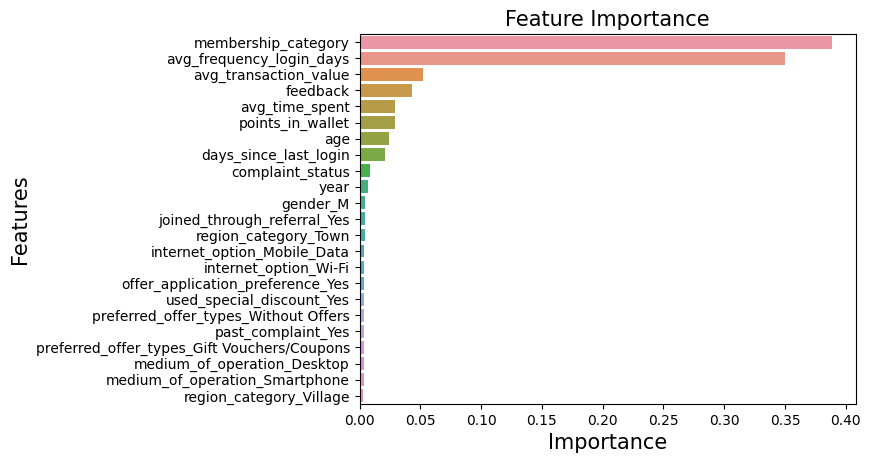

In [35]:
important_features = pd.DataFrame({'Features': X_train1.columns, 
                                   'Importance': model.feature_importances_})

important_features = important_features.sort_values('Importance', ascending = False)

sns.barplot(x = 'Importance', y = 'Features', data = important_features)

plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

plt.show()

##### Important features are identified using Random Forest and dropping inconsistent features.

In [36]:
X = Features.drop(['region_category_Village',
                       'offer_application_preference_Yes',
                       'used_special_discount_Yes',
                       'preferred_offer_types_Gift Vouchers/Coupons',
                       'past_complaint_Yes',
                       'preferred_offer_types_Without Offers',
                       'medium_of_operation_Smartphone',
                       'medium_of_operation_Desktop',
                       'internet_option_Wi-Fi',
                       'internet_option_Mobile_Data',
                       'region_category_Town',
                      ], axis =1)
y = Target

In [37]:
X

,gender_M,joined_through_referral_Yes,year,membership_category,complaint_status,feedback,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet
0,0,0,4,4.0,1.0,4,-1.209342,0.756268,0.098431,1.566300,1.032977,0.435508
1,0,0,4,5.0,3.0,5,-0.326297,0.573495,-0.849870,-0.883072,-1.090570,0.465956
2,0,1,5,0.0,4.0,3,0.430599,0.207949,0.775788,-0.383731,-1.992103,1.584823
3,1,1,5,0.0,2.0,3,-0.010923,-0.340370,-1.391756,-0.126849,-1.271298,-0.883541
4,0,0,4,0.0,3.0,3,-0.389371,1.304586,-0.037041,-0.172944,-0.244497,-0.564337
...,...,...,...,...,...,...,...,...,...,...,...,...
28768,1,1,6,4.0,1.0,0,-0.641670,0.025176,-0.037041,-1.164354,0.675857,-0.443289
28769,0,0,4,1.0,0.0,0,0.556749,-1.985326,-1.391756,-0.002565,-0.497968,1.312225
28770,0,0,5,1.0,1.0,1,-0.515521,0.025176,1.588617,-0.990926,-1.698270,0.260637
28771,0,1,5,1.0,2.0,3,-0.893969,-0.157597,-0.488613,0.659060,-0.057111,-0.341385


In [38]:
# separate dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape


((23018, 12), (5755, 12))

### Create Functions for Model Training and Evaluation

In [39]:
def evaluate_model(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [40]:
clf1 = XGBClassifier(random_state=7)
clf2 = CatBoostClassifier(verbose=False)
clf3 = AdaBoostClassifier(n_estimators=250, learning_rate = 0.01,random_state=7)
clf4 = RandomForestClassifier(random_state=7)

In [41]:
vclf1 = VotingClassifier(estimators=[('XGB', clf1), ('CatBoost', clf2), ('AdaBoost' , clf3)],
                                   voting='soft')

In [42]:
vclf2 = VotingClassifier(estimators=[('XGB', clf1), ('CatBoost', clf2), ('RF' , clf4)],
                                   voting='soft')

In [43]:
models = {
    "Random Forest": RandomForestClassifier(random_state=7),
    "Decision Tree": DecisionTreeClassifier(random_state=7),
    "Gradient Boosting": GradientBoostingClassifier(random_state=7),
    "Logistic Regression": LogisticRegression(random_state=7),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(random_state=7), 
    "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier(random_state=7),
    "Gaussian NB" : GaussianNB(),
    "SVC" : SVC(random_state=7),
    "vclf1" : vclf1,
    "vclf2" : vclf2
    
}

### Evaluation of all basic models

In [44]:
model_list = []
accuracy_list = []
recall_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_test_pred = model.predict(X_test)
    
    # Test set performance
    model_test_accuracy,model_test_f1,model_test_precision,\
    model_test_recall,model_test_rocauc_score=evaluate_model(y_test, y_test_pred)
    test_evaluate = evaluate_model(y_test, y_test_pred)    
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
        
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
    accuracy_list.append(model_test_accuracy)
    recall_list.append(model_test_recall)
    
    print('='*35)
    print('\n')
    
   

Random Forest
Model performance for Test set
- Accuracy: 0.9401
- F1 score: 0.9466
- Precision: 0.9394
- Recall: 0.9538
- Roc Auc Score: 0.9383


Decision Tree
Model performance for Test set
- Accuracy: 0.9048
- F1 score: 0.9140
- Precision: 0.9192
- Recall: 0.9089
- Roc Auc Score: 0.9043


Gradient Boosting
Model performance for Test set
- Accuracy: 0.9390
- F1 score: 0.9453
- Precision: 0.9445
- Recall: 0.9460
- Roc Auc Score: 0.9381


Logistic Regression
Model performance for Test set
- Accuracy: 0.8598
- F1 score: 0.8735
- Precision: 0.8772
- Recall: 0.8699
- Roc Auc Score: 0.8585


K-Neighbors Classifier
Model performance for Test set
- Accuracy: 0.9008
- F1 score: 0.9121
- Precision: 0.8998
- Recall: 0.9248
- Roc Auc Score: 0.8977


XGBClassifier
Model performance for Test set
- Accuracy: 0.9376
- F1 score: 0.9450
- Precision: 0.9286
- Recall: 0.9619
- Roc Auc Score: 0.9345


CatBoosting Classifier
Model performance for Test set
- Accuracy: 0.9387
- F1 score: 0.9459
- Precision: 

In [45]:
pd.DataFrame(list(zip(model_list,accuracy_list, recall_list)), columns=['Model Name',"Accuracy" ,'Recall']).sort_values(by=["Recall"],ascending=False)
        


,Model Name,Accuracy,Recall
6,CatBoosting Classifier,0.938662,0.962547
5,XGBClassifier,0.937619,0.961923
7,AdaBoost Classifier,0.926672,0.960674
10,vclf1,0.937272,0.960674
11,vclf2,0.938662,0.960362
0,Random Forest,0.940052,0.953808
2,Gradient Boosting,0.939010,0.946005
9,SVC,0.901129,0.926966
4,K-Neighbors Classifier,0.900782,0.924782
1,Decision Tree,0.904778,0.908864


### XGBoost HyperParameter Tuning with Optuna

In [46]:
def objective(trial):
    """Define the objective function"""

    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'eval_metric': 'mlogloss',
        'use_label_encoder': False
    }

    # Fit the model
    optuna_model = XGBClassifier(**params)
    optuna_model.fit(X_train, y_train)

    # Make predictions
    y_pred = optuna_model.predict(X_test)
    
    # Test set performance
    model_test_accuracy,model_test_f1,model_test_precision,\
    model_test_recall,model_test_rocauc_score=evaluate_model(y_test, y_pred)
    
    model_recall = model_test_recall
    return model_recall

In [47]:
study = optuna.create_study(direction='maximize')

[I 2023-04-03 23:42:08,813] A new study created in memory with name: no-name-a03a4a7e-a1d0-46f8-abde-1d9fc6c99ac1


In [48]:
study.optimize(objective, n_trials=30)

[I 2023-04-03 23:42:09,846] Trial 0 finished with value: 0.9416354556803995 and parameters: {'max_depth': 1, 'learning_rate': 0.11547248295146642, 'n_estimators': 208, 'min_child_weight': 4, 'gamma': 0.06568547126593641, 'subsample': 0.8036283930194468, 'colsample_bytree': 0.04425669102841182, 'reg_alpha': 0.0045000006533531985, 'reg_lambda': 7.691836854151863e-08}. Best is trial 0 with value: 0.9416354556803995.
[I 2023-04-03 23:42:10,610] Trial 1 finished with value: 0.9753433208489388 and parameters: {'max_depth': 9, 'learning_rate': 0.04229364350489049, 'n_estimators': 52, 'min_child_weight': 3, 'gamma': 7.280454740008975e-05, 'subsample': 0.4613353610883611, 'colsample_bytree': 0.017390882543029937, 'reg_alpha': 6.980068988092405e-05, 'reg_lambda': 1.2796137896077143e-06}. Best is trial 1 with value: 0.9753433208489388.
[I 2023-04-03 23:42:15,408] Trial 2 finished with value: 0.9547440699126092 and parameters: {'max_depth': 7, 'learning_rate': 0.22894510543235028, 'n_estimators': 

[I 2023-04-03 23:42:41,233] Trial 19 finished with value: 0.9594257178526842 and parameters: {'max_depth': 7, 'learning_rate': 0.030298643984866785, 'n_estimators': 169, 'min_child_weight': 2, 'gamma': 7.1445427156540585e-06, 'subsample': 0.22203065555953627, 'colsample_bytree': 0.032422811775311235, 'reg_alpha': 8.13779549691286e-06, 'reg_lambda': 7.636880781153886e-05}. Best is trial 12 with value: 0.9906367041198502.
[I 2023-04-03 23:42:44,166] Trial 20 finished with value: 0.9509987515605494 and parameters: {'max_depth': 6, 'learning_rate': 0.05270436397355072, 'n_estimators': 351, 'min_child_weight': 5, 'gamma': 1.0359674637509045e-07, 'subsample': 0.25165810282800954, 'colsample_bytree': 0.16543405439324435, 'reg_alpha': 7.914535977888166e-07, 'reg_lambda': 0.0006928843538868312}. Best is trial 12 with value: 0.9906367041198502.
[I 2023-04-03 23:42:45,387] Trial 21 finished with value: 0.9903245942571786 and parameters: {'max_depth': 8, 'learning_rate': 0.010389281818055629, 'n_e

In [49]:
print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

Number of finished trials: 30
Best trial:
  Value: 0.9906367041198502
  Params: 
    max_depth: 5
    learning_rate: 0.010872279675903252
    n_estimators: 141
    min_child_weight: 1
    gamma: 1.1471238282903368e-08
    subsample: 0.07077486063368742
    colsample_bytree: 0.07243060386390768
    reg_alpha: 6.031808286099722e-06
    reg_lambda: 1.7096269396710682e-05


### CatBoost HyperParameter Tuning with Optuna

In [50]:
def objective(trial):

    param = {
        "objective": trial.suggest_categorical("objective", ["Logloss", "CrossEntropy"]),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),
        "depth": trial.suggest_int("depth", 1, 12),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]
        ),
        "used_ram_limit": "3gb",
    }

    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1)

    gbm = CatBoostClassifier(**param)

    gbm.fit(X_train, y_train, verbose=0, early_stopping_rounds=100)

    y_pred = gbm.predict(X_test)
    
    # Test set performance
    model_test_accuracy,model_test_f1,model_test_precision,\
    model_test_recall,model_test_rocauc_score=evaluate_model(y_test, y_pred)
    
    model_recall = model_test_recall
    return model_recall

In [51]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30, timeout=600)

[I 2023-04-03 23:42:56,948] A new study created in memory with name: no-name-08dbc9df-aa12-4dbb-b5ac-3722d5b6c753
[I 2023-04-03 23:43:23,085] Trial 0 finished with value: 0.9509987515605494 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.05465564454285879, 'depth': 4, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli', 'subsample': 0.6162120026001399}. Best is trial 0 with value: 0.9509987515605494.
[I 2023-04-03 23:43:48,924] Trial 1 finished with value: 0.9450686641697877 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.0246624112371839, 'depth': 6, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli', 'subsample': 0.883153046111787}. Best is trial 0 with value: 0.9509987515605494.
[I 2023-04-03 23:44:15,009] Trial 2 finished with value: 0.9456928838951311 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.02401496209711, 'depth': 7, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 0 with value: 0.9509987

[I 2023-04-03 23:51:12,138] Trial 26 finished with value: 0.9563046192259675 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.08162350019226511, 'depth': 11, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'subsample': 0.3031877902653782}. Best is trial 24 with value: 0.9634831460674157.
[I 2023-04-03 23:51:43,529] Trial 27 finished with value: 0.9556803995006242 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.0947032204505959, 'depth': 12, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 4.219448361764456}. Best is trial 24 with value: 0.9634831460674157.
[I 2023-04-03 23:51:51,894] Trial 28 finished with value: 0.9597378277153558 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.09008731457447157, 'depth': 10, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'subsample': 0.19828330282845336}. Best is trial 24 with value: 0.9634831460674157.
[I 2023-04-03 23:52:19,055] Trial 29 finished 

In [52]:
print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

Number of finished trials: 30
Best trial:
  Value: 0.9634831460674157
  Params: 
    objective: Logloss
    colsample_bylevel: 0.09189742609156308
    depth: 11
    boosting_type: Ordered
    bootstrap_type: Bernoulli
    subsample: 0.27077607443142304


### Fitting the Final model and get reports

In [55]:
params = {
    'max_depth': 5,
    'learning_rate': 0.010872279675903252,
    'n_estimators': 141,
    'min_child_weight': 1,
    'gamma': 1.1471238282903368e-08,
    'subsample': 0.07077486063368742,
    'colsample_bytree': 0.07243060386390768,
    'reg_alpha': 6.031808286099722e-06,
    'reg_lambda': 1.7096269396710682e-05
}
        
# Fit the model
best_model = XGBClassifier(**params)
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)
    
# Test set performance
model_test_accuracy,model_test_f1,model_test_precision,\
model_test_recall,model_test_rocauc_score=evaluate_model(y_test, y_pred)
    
print(f"Recall of Model : {model_test_recall}")
      
print(f"Accuracy of Model : {model_test_accuracy}")        

Recall of Model : 0.9906367041198502
Accuracy of Model : 0.9223284100781929


## Conclusion

#### Criteria for selection of model was Recall because we want to focus on coustomers leaving ie. 1(EXIT)  
#### Xgboost(Hyperparameter Tunned) is giving higest Recall, thus it was selected for prediction.